<a href="https://colab.research.google.com/github/nallagondu/FlipRoboTechnologies/blob/main/Project_2_Discussion_Tesla_stock_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**The data set contains the Tesla Stock Data form 2010-06-29 to 2020-02-03**

TESLA has been on the rice recently ,with a crazy  +100% spike in the last 30 days  alone .

with the history ,maybe we can find out  why ?

Stock data Includes open ,High ,Low ,Adj close and Volume

In Stock trading , the high and low refer to the maximum and minumum prices in a given time period. open and close are the prices at which  a stock began and ended trading in the same period.
Volume is the totla amount of trading activity. adjusted valuesfactor in corporate actions such as dividends ,stock splits , and new share issuance

Varaiables in data set :

Date:
Represents the date of the relevent transaction Day

Open	: Initial share price of the relevent Tradinf Day

  High: Highesr price of the relevent Trading day

  Low	: Lowest price of the relevnt trading Day

  Close: Closing Price of the stock on the relevent trading day
  
  Adj  Close : Adjusted closing prie of the stock of the relavent trading day
  
Volume  :  Trading volume information of the relevent trading day



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/Datasets/main/TSLA.csv")
df

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
print("The Dimension of the datasert:",df.shape)
print(f"\n The column headers in the dataset:{df.columns}")


That Dataset contains 2416 rows and 7 columns . Out of which 1 is target variable and remaining 6 are independent variables

In [ ]:
print("Min. Date:", df.Date.min())
print("Max. Date:",df["Date"].max())


In [ ]:
df.isnull().sum()

We can see there are no null values present in this dataset

In [ ]:
df.info()

THis gives us the brief about the dataset which includes indxing type ,column type,no null values and memory usage .




Here we have to check the "  Date       2416 non-null   object "

we need to chang the date datatype form object to date.time

In [ ]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())  #, cmap = 'viridis', cbar =False

We can clearly visualize that there is ni missing data present

In [ ]:
df.info()

In [ ]:
import pandas as pd
#Converting the datatype of Date column form object to date time
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df.info()

In [ ]:
#setting Date as Dateframe Index
df.set_index("Date", inplace = True)


# the set_index() function is used to set the DataFrame index using existing columns


In [ ]:
df

In [ ]:
#checking the number of unique values in each column
df.nunique().to_frame("no of unique values")

In [ ]:
#checking the value count of each column
for i in df.columns:
  print(df[i].value_counts())
  print("\n")

In [ ]:
#As pe rthe above observation we can see Adj Close  and close columns have same values
df.drop(["Adj Close"], axis=1, inplace= True)

In [ ]:
df.head()

##Checking Duplicate values in DataFrame

In [ ]:
print("find the duplicate values :", df.duplicated().sum())

In [ ]:
df.describe()

This Gives the statistical inforamtin of the numerical columns . The summary of the dataset looks perfect since there is no negitive /invalid values present

form the above desctiption we can observer the following :

The counts of all the columns are smae which means there are no missing values in the data set


The median (50%) values is greater than the mean in open,High ,low close columns which means the data is skewed to left in these column

By summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers present in the data

we can also notice the standerd deviation ,minimum value, 25% percentile values form this describe method



In [ ]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize =14)
plt.ylabel('Features_name', fontsize =14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()


A heat map is a graphical representation of data where individual values contained in a matrix are represented as colors. Heat maps are widely used in various fields, including statistics, data analysis, and data visualization, to quickly convey the density, concentration, or pattern of data.

**Purpose of a Heat Map:**
#**Visualizing Data Distribution:**

Heat maps allow you to see the distribution and variation of data across different variables. For example, they can be used to visualize the density of data points in a geographical area or to show the frequency of events over time.

#**Identifying Patterns and Trends:**
They help identify patterns, correlations, and trends in the data that might not be immediately apparent from raw numbers. For instance, in a heat map of a correlation matrix, you can quickly identify which variables are highly correlated.
#**Highlighting Outliers:**

Heat maps can highlight outliers or unusual values in the dataset. This is useful for detecting anomalies or data points that deviate significantly from the norm.
#**Comparing Data:**

They provide a way to compare data across different categories or groups. For instance, you can compare sales performance across different regions or departments using a heat map.
#**Enhancing Data Interpretation:**

The use of colors in heat maps enhances the interpretability of complex data sets, making it easier for stakeholders to understand and analyze the data.
#**Resource Allocation and Decision Making:**

In business contexts, heat maps can assist in resource allocation and decision-making processes. For example, a heat map showing customer engagement across different product lines can help decide where to focus marketing efforts.

**Example Use Cases:**
#**Correlation Matrix: **In data analysis, a heat map of a correlation matrix helps to understand the relationships between different variables in the dataset.



import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = sns.load_dataset("iris")
correlation_matrix = data.corr()

# Heat map of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()



**Missing Values:** Visualizing missing data in a dataset. The heat map can show which columns and rows have missing values, making it easier to decide how to handle them.



sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

**Interpretation:**
Color Scale: The colors in a heat map represent different ranges of values. Typically, a gradient from light to dark (or one color to another) indicates the range from low to high values.
Annotations: Adding annotations (numerical values) to the heat map can help in understanding the exact values represented by the colors.
Clustering: Sometimes, heat maps are used in conjunction with clustering algorithms to group similar rows or columns together, enhancing the ability to spot patterns.


In [ ]:
sns.lmplot(x='Open',y='Close',data=df,palette='colorblind')


**Open** has a positive correlation with **close**

**The primary purpose of 'lmplot' is to create scatter plots that also include a linear regression model fit. This allows for visualizing the relationship between two continuous variables, along with the best-fit line and confidence intervals.**

lmplot :- it combind regplot and facegrid



**When to Use lmplot?**
##You should use lmplot in the following scenarios:

**Exploring Relationships:**

When you want to explore and visualize the linear relationship between two continuous variables.

**Adding Linear Regression:**

When you need to add a regression line to a scatter plot to highlight trends and patterns in the data.

**Facet Grids:**

When you want to create a grid of plots, lmplot supports faceting by one or more categorical variables, allowing you to see the linear relationships across different subsets of the data.

**Quick Visualization:**

When you need a quick and informative visualization of the data, including both data points and a fitted regression model.


In [ ]:
sns.lmplot(x='Low',y='Close',data=df,palette='colorblind')


#Low has a positive correlation with close

In [ ]:
sns.lmplot(x='Volume',y='Close',data=df,palette='colorblind')

#Volume has a positive correlation with close,but it is not a strong correlation

In [ ]:
sns.lmplot(x='Volume',y='High',data=df,palette='colorblind')

Volume has a positive correlation with High ,but it is not a strong correlation

In [ ]:
plt.figure(figsize=(24,30)) # created a figure with dimanction
p = 1
for i in df:
  if p<=17:  # option  based on the data you have to cover it
    plt.subplot(5,4,p)  # How many columns and how many rows
    sns.regplot(x='Close',y=i,data=df,color='r') #using regplot
    plt.xlabel('Close')
    plt.ylabel(i)
  p+=1
plt.show()

In [ ]:
#using regplot :

plt.figure(figsize=(24,30))
p = 1
for i in df:
  if p<=17:
    plt.subplot(5,4,p)
    sns.regplot(x='Open',y=i,data=df,color='r')
    plt.xlabel('Open')
    plt.ylabel(i)
  p+=1
plt.show()

#Open to other columns

In [ ]:
#using sctter plot  :

plt.figure(figsize=(24,30))
p = 1
for i in df:
  if p<=17:
    plt.subplot(5,4,p)
    sns.scatterplot(x='Close',y=i,data=df,color='b')
    plt.xlabel('Open')
    plt.ylabel(i)
  p+=1
plt.show()

# to other columns



# Scattor and regplot difference is **best fit** lien is not available in scattor plot and
**Correlation** we can find using best fit line in regression Plot
**lmplot: if we want to go for different samples we can use  

In [ ]:
sns.pairplot(data=df,palette='dark2') #  it find the relation ship  ship between the all columns

The pairplot gives the pairwise relation between the features.

on the diagonal we can notice the distribution plots


the feature low ,High and Open,close have strong linearrelation with each other



In [ ]:
plt.figure(figsize=(18,9))
plt.plot(df.Close, label = 'Closing Price')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title("Tesla Stock Price")
plt.show()

In [ ]:
plt.figure(figsize=(18,9))
sns.lineplot(data=df.iloc[:,:-1]) # adedd alll data except last colum it'is Volum

#plt.plot(df.Close, label = 'Closing Price')
plt.ylabel('Stock value')
plt.xlabel('Time')
plt.title("Tesla Stock General Trend of all values ")
plt.show()

#to find the how the data moving (either increasing or decresing for all data )

##Lets check the outliers by plotting box plot



In [ ]:
plt.figure(figsize=(24,30))
p = 1
for i in df:
  if p<=13:
    plt.subplot(5,4,p)
    sns.boxplot(df[i],palette='Set2_r')
    plt.xlabel(i)
  p+=1
plt.show()


##NOTE:
**Understanding Outliers**
Outliers are data points that differ significantly from other observations in a dataset. They can arise due to variability in the data, measurement errors, or other factors. Detecting and managing outliers is a critical part of data analysis because they can affect statistical analyses and the performance of machine learning models.

**Identifying Outliers**
There are several methods to identify outliers in a dataset:

**Visual Methods:**

Box Plot: Shows the distribution of data and highlights points outside the whiskers as potential outliers.
Scatter Plot: Visualizes the relationship between two variables and can indicate outliers.
Histogram: Displays the frequency distribution and can help identify outliers in univariate data.

**Statistical Methods:**

**Z-Score**: Measures the number of standard deviations a data point is from the mean. Data points with a Z-score greater than 3 or less than -3 are often considered outliers.
**IQR (Interquartile Range)**: Data points outside 1.5 times the IQR above the third quartile or below the first quartile are considered outliers.
**MAD (Median Absolute Deviation)**: Similar to the Z-score but more robust to non-normal distributions.

##**Handling Outliers**
**Once identified, outliers can be handled in several ways:**

**Removing Outliers:** Simply excluding outliers from the dataset. This can be appropriate if the outliers are errors or irrelevant to the analysis.



df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

**Transforming Data:** Applying transformations (e.g., logarithmic, square root) to reduce the impact of outliers.


df['feature'] = np.log(df['feature'])

**Capping/Flooring:** Limiting the values of outliers to a specified maximum or minimum.


df['feature'] = np.where(df['feature'] > upper_limit, upper_limit, df['feature'])
df['feature'] = np.where(df['feature'] < lower_limit, lower_limit, df['feature'])

**Imputing Values:** Replacing outliers with a specific value, such as the mean or median.



df.loc[df['feature'] > upper_limit, 'feature'] = df['feature']



##Note :  should I Drop the Outliers ?
we need domain knowledge .
##1. Drop the outliers and build the model check the performance
##2. Don't Drop the outliers and build the model check the performance

see the perofrmance of the models and consider if any issues and effect in the performance and model

in current case  : we can't drop the outlaiers becuase this is stock data



In [ ]:
#1. Drop the outliers and build the model check the performance

from scipy.stats import zscore
out_feature = df[['Open', 'High', 'Low', 'Volume']]
z= np.abs(zscore(out_feature))
z
# we taken list of values and not takine target variable .
#


**from scipy.stats import zscore:** This line imports the zscore function from the scipy.stats module. zscore is used to calculate the z-score of each element in a dataset.

**out_feature = df[['Open', 'High', 'Low', 'Volume']]:** This line selects the columns 'Open', 'High', 'Low', and 'Volume' from the DataFrame df and assigns them to the variable out_feature.

**z = np.abs(zscore(out_feature)):** This line calculates the absolute z-scores for each element in the out_feature DataFrame using the zscore function. The np.abs function is from the NumPy library and is used to calculate the absolute values of the z-scores.

**np.where(z > 3):** This line uses NumPy's where function to find the indices where the condition z > 3 is True. In this context, it's identifying the elements in the z array (which contains the z-scores) that are greater than 3. This can be useful for identifying outliers in the dataset, as z-scores greater than 3 are typically considered to be outliers.

In [ ]:
#Threshold = 3

# Finding out the threshold value  99.7%  negitive -3 to +3
np.where(z>3)

#z = (datapoint/observed value -mean of the sample)/standerd deviation od the sample

In [ ]:
z.iloc[723,3]

In [ ]:
#Now removing the data above zscore and creating new DF
df1 = df[(z<3).all(axis=1)]
df1.shape

In [ ]:
df1.head()

In [ ]:
df1.tail()

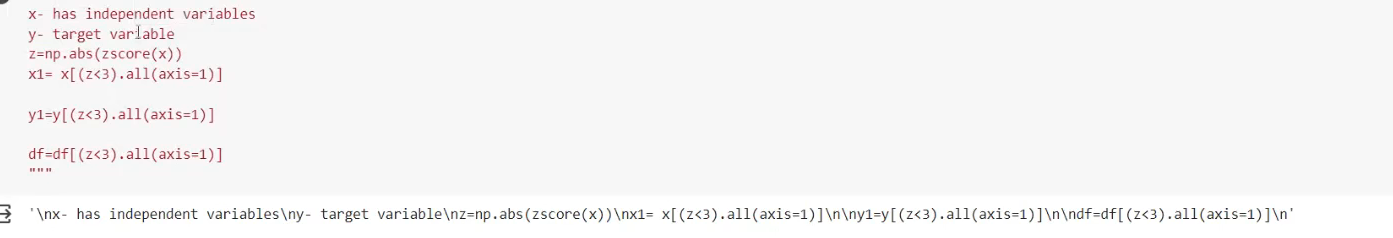


In [ ]:
#shape of old and new Dataframe
print("Old data frame ", df.shape[0])
print("New data frame shape ", df1.shape[0])

In [ ]:
print("Data loose percentage -",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

# not more than 10 % data loss ,if it  is must not / more than 10 % we have to use different method

In [ ]:
df1

In [ ]:
#Distrubuted plot
plt.figure(figsize=(20,25),facecolor = 'green')
pltnumber = 1

for column in df:
  if pltnumber<=18:
      ax= plt.subplot(6,4,pltnumber)
      sns.distplot(df[column],color='b')
      plt.xlabel(column,fontsize=20)
  pltnumber+=1
plt.show()

Observation : From the above distrubution plots ,we can notice that the data almost looks normal in all the columns **except volum**


***Checking of Skewness ***

In [ ]:
df.skew()

In [ ]:
#Removing the skewness using cuberoot method
df['Volume'] = np.cbrt(df['Volume'])



In [ ]:
df.skew()

In [ ]:
sns.distplot(df['Volume'],color='m',kde_kws = {"shade":True}, hist = False)
plt.show()


In [ ]:
#Distrubuted plot  visualization again
plt.figure(figsize=(20,25),facecolor = 'red')
pltnumber = 1

for column in df:
  if pltnumber<=13:
      ax= plt.subplot(4,4,pltnumber)
      sns.distplot(df[column],color='green')
      plt.xlabel(column,fontsize=20)
  pltnumber+=1
plt.show()

## we have removed skewness using cuberoot method

**Correlation between target variable and independent variable **

In [ ]:
df.corr()

This gives the correlation between the dependent and independent variables.  we can visualize this by plotting heatmap

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linecolor='black',cmap='Spectral')

plt.ylabel('Feature name',fontsize = 14)
plt.xlabel('Figure', fontsize=14)
plt.title("Discriptive Graph ", fontsize = 20)
plt.show()


In [ ]:
df.corr().Close.sort_values()

We can observer the positive correlated features with the target

##**Visualizing the correlation between label and features using bar plot**

In [ ]:
plt.figure(figsize=(18,8))
df.corr()['Close'].sort_values(ascending = False).drop(['Close']).plot(kind='bar',color='m')
plt.ylabel('Target',fontsize = 14)
plt.xlabel('Figure', fontsize=14)
plt.title("Correlation between the label and features using  barplot ", fontsize = 20)
plt.show()


In [ ]:
#Seperating features and label

# seperating the independent target varaibless into x and y
x = df1.drop('Close',axis=1)
y=df1["Close"]
print("Feature Dimension = ",x.shape)
print("Label Dimensiton = ",y.shape)

In [ ]:
##Feature Scaling Using Standerd Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x

We have scaled the data using Standerd Scalarization method to overcome the issue of biasness

Checking variance Inflation Factors(VIF)

In [ ]:
#Finding Variance inflation factor in each scaled column i.e x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

In [ ]:
#Again Checking VIF  Variance inflation factor value to confirm whether the multicollinearity still exists or not
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

**Finding the best random state**

In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

**Creating Train test *Split***

In [ ]:
# Finding the best random state
maxAccu = 0
maxRs =0
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred_lr = lr.predict(x_test)
  acc_lr = r2_score(y_test,pred_lr)
  if acc_lr>maxAccu:
    maxAccu=acc_lr
    maxRs = i
print("Maximum r2 score is ",maxAccu,"On random state", maxRs)



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=maxRs)

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor as KNN


In [ ]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train = LR.predict(x_train)
print(LR)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print("Mean absolute Error:",mean_absolute_error(y_test,pred_LR))
print("Mean squared Error :", mean_squared_error(y_test,pred_LR))
print("Mean root squared Error", np.sqrt(mean_squared_error(y_test,pred_LR)))


# usuing test data 30%

LinearRegression()

R2_score: 0.9997654701029349

R2_score on training data: 99.96886623772556

Mean absolute Error: 1.2352168018044711

Mean squared Error : 3.2450005381698146

Mean root squared Error 1.801388502841576

In [ ]:
plt.figure(figsize=(14,11))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

In [ ]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print(RFR)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print("Mean absolute Error:",mean_absolute_error(y_test,pred_RFR))
print("Mean squared Error :", mean_squared_error(y_test,pred_RFR))
print("Mean root squared Error", np.sqrt(mean_squared_error(y_test,pred_RFR)))

In [ ]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train = knn.predict(x_train)
print(knn)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print("Mean absolute Error:",mean_absolute_error(y_test,pred_knn))
print("Mean squared Error :", mean_squared_error(y_test,pred_knn))
print("Mean root squared Error", np.sqrt(mean_squared_error(y_test,pred_knn)))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR= GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print(GBR)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print("Mean absolute Error:",mean_absolute_error(y_test,pred_GBR))
print("Mean squared Error :", mean_squared_error(y_test,pred_GBR))
print("Mean root squared Error", np.sqrt(mean_squared_error(y_test,pred_GBR)))

In [ ]:

lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso= lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print(lasso)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print("Mean absolute Error:",mean_absolute_error(y_test,pred_lasso))
print("Mean squared Error :", mean_squared_error(y_test,pred_lasso))
print("Mean root squared Error", np.sqrt(mean_squared_error(y_test,pred_lasso)))

In [ ]:

rid = Ridge()
rid.fit(x_train,y_train)
pred_rid= rid.predict(x_test)
pred_train = rid.predict(x_train)
print(rid)
print('R2_score:',r2_score(y_test,pred_rid))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print("Mean absolute Error:",mean_absolute_error(y_test,pred_rid))
print("Mean squared Error :", mean_squared_error(y_test,pred_rid))
print("Mean root squared Error", np.sqrt(mean_squared_error(y_test,pred_rid)))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr= dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print(dtr)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print("Mean absolute Error:",mean_absolute_error(y_test,pred_dtr))
print("Mean squared Error :", mean_squared_error(y_test,pred_dtr))
print("Mean root squared Error", np.sqrt(mean_squared_error(y_test,pred_dtr)))

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)
pred_svr= svr.predict(x_test)
pred_train = svr.predict(x_train)
print(svr)
print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print("Mean absolute Error:",mean_absolute_error(y_test,pred_svr))
print("Mean squared Error :", mean_squared_error(y_test,pred_svr))
print("Mean root squared Error", np.sqrt(mean_squared_error(y_test,pred_svr)))

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr= etr.predict(x_test)
pred_train = etr.predict(x_train)
print(etr)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print("Mean absolute Error:",mean_absolute_error(y_test,pred_etr))
print("Mean squared Error :", mean_squared_error(y_test,pred_etr))
print("Mean root squared Error", np.sqrt(mean_squared_error(y_test,pred_etr)))

In [ ]:
from sklearn.model_selection import cross_val_score

""" default scoring parameter in cross validation for classification model is -accuracy default scoring parameter in cross validation for regression models is - r squared score """

In [ ]:
score = cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Dirrerence between R2 Score and cross validation score is -", (r2_score(y_test,pred_LR)- score.mean())*100)

In [ ]:
score_RFR = cross_val_score(RFR,x,y)
print(score_RFR)
print(score_RFR.mean())
print("Dirrerence between R2 Score and cross validation score is in RFR -", (r2_score(y_test,pred_RFR)- score_RFR.mean())*100)

In [ ]:
score_knn = cross_val_score(knn,x,y)
print(score_knn)
print(score_knn.mean())
print("Dirrerence between R2 Score and cross validation score  in KNN is  -", (r2_score(y_test,pred_knn)- score_knn.mean())*100)

In [ ]:
score_GBR = cross_val_score(GBR,x,y)
print(score_GBR)
print(score_GBR.mean())
print("Dirrerence between R2 Score and cross validation score  in GBR is  -", (r2_score(y_test,pred_GBR)- score_GBR.mean())*100)

In [ ]:
score_lasso = cross_val_score(lasso,x,y)
print(score_lasso)
print(score_lasso.mean())
print("Dirrerence between R2 Score and cross validation score  in GBR is  -", (r2_score(y_test,pred_lasso)- score_lasso.mean())*100)

In [ ]:
score_dtr = cross_val_score(dtr,x,y)
print(score_dtr)
print(score_dtr.mean())
print("Dirrerence between R2 Score and cross validation score  in DTR is  -", (r2_score(y_test,pred_dtr)- score_dtr.mean())*100)

In [ ]:
score_rid = cross_val_score(rid,x,y)
print(score_rid)
print(score_rid.mean())
print("Dirrerence between R2 Score and cross validation score  in Ridge is  -", (r2_score(y_test,pred_rid)- score_rid.mean())*100)

In [ ]:
score_svr = cross_val_score(svr,x,y)
print(score_svr)
print(score_svr.mean())
print("Dirrerence between R2 Score and cross validation score  in SVR is  -", (r2_score(y_test,pred_svr)- score_svr.mean())*100)

In [ ]:
score_etr = cross_val_score(etr,x,y)
print(score_etr)
print(score_etr.mean())
print("Dirrerence between R2 Score and cross validation score  in SVR is  -", (r2_score(y_test,pred_etr)- score_etr.mean())*100)

###Frpm the difference  of both R2 score and cross validation score computed on R2 score we can conclude that **RIdge and Linear Regression**  regressionas our best fitting and performing model .


concluded that Ridge is the best model


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

param = {'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
         'solver':['auto','svd','cholesky','isqr','saga','ibfgs'],
         'positive':[False,True],
         'random_state':[1,4,10,20]
         }
gscv=GridSearchCV(Ridge(), param, cv=5)  #Fix Indentation
gscv.fit(x_train,y_train)

In [ ]:
gscv.best_params_

In [ ]:
Model=Ridge(alpha=0.05,fit_intercept=True,positive=False,random_state=1,solver= 'svd')

In [ ]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('Mean absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print("Root Mean squared Error:", np.sqrt(mean_squared_error(y_test,pred)))

In [ ]:
import joblib  # this is one of the method to save the model
#joblib.dump(Model, Tesla_stock.pkl)

**Here, we are using pickle method to save the model **

In [ ]:
import pickle
filename= 'tesla_stock.pkl'
pickle.dump(Model,open(filename,'wb')) #saved model

done ....


if I want to re use this model again...follow the below steps  



In [ ]:
import pickle
loaded_model = pickle.load(open('tesla_stock.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

In [ ]:
Conclusion =pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['predicted',"Original"])

Conclusion

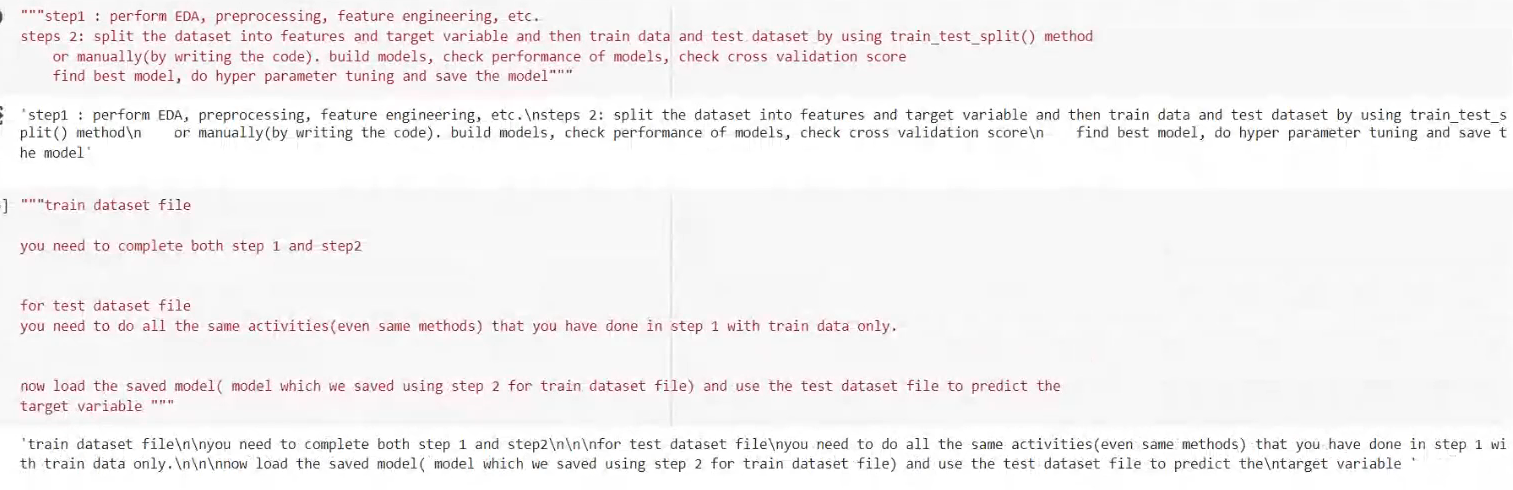

In [ ]:
#2. Don't Drop the outliers and build the model check the performance